# EmKa Akademi Bitime Projesi
## Ön tanıtım

İnternetten bir film izlemek istediğinizi hayal edin. İnternetteki film puanlamalarına ne kadar güvenebilirsiniz ? *Özellikle* reytingi gösteren aynı şirket sinema bileti satarak da para kazanıyorsa. Sizce de derecelendirme konusunda insanları yanlış yönlendirmesi söz konusu olabilir mi ?

### Hedef:

**Amacınız aşağıdaki görevleri tamamlayarak *Fandango* websitesinin ratingler konusunda bir yanlış yapıp yapmadığını emin bir şekilde ispatlamak**

---
---

** Bu da bir sorulu analizdir. Aşağıda sorulan sorulara cevap vermeye ve çıktılara yakın bir çıktı elde etmeye çalışmanız gerekmektedir. **

---
----

## Part One: Datayı Anlamak

### The Data

Elimizde biri şüphelenilen *Fandango* sitsine ait yıldızlar ve film derecelendirmeleri içeriyor. Diğeri ise diğer film sitelerindeki film derecelendirmeleri için veriler içeren toplam 2 csv dosyası vardır.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` Bütün benzeri sitelerin açıklama kullanıcı puanlamaları bilgilerini ve özellikle 'Rotten Tomatoes(Çürük Elma) adlı bir filme ait başka sitelerdeki puanları içermektedir.'

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` Fandango sitesine ait 538 film içermektedir

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Analizinde işinize yarayacağını düşündüğünüz kütüphanaleri import edin:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Fandango sitesini keşfetmeye çalışalım. Gerçek kullanıcı derecelendirmelerini ve site puanlarını yavaştan karşılaştıralım

Fandangonun filmleri puanlama ve derecelendirme konusunda taraflı davranıp davranmadığını analiz etmeye başlayalım !

**TASK: Aşağıdaki fandango_scrape.csv dosyasını çalıştırın**

In [ ]:
fandango = pd.read_csv(r"fandango_scrape.csv")

**TASK: Fandango verilerini keşfetmeye çalışın. Aşağıdakine benzer çıktılar elde edin.**

# Uyarı ! çıktının tam üstünü kullanmayın. Bir üst hücre satırında çalışmalar yapın.

In [ ]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
# Buraya kod yazmayın !

In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#@title Default title text
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

**TASK: Verimizdeki filmlere ait votes ile rating arasındaki ilişkiyi keşfedelim. Derecelendirme ve oylar arasındaki ilişkiyi gösteren bir scatterplot grafiği oluşturun. Görsel stil eklemeler tamamen size kalmış**

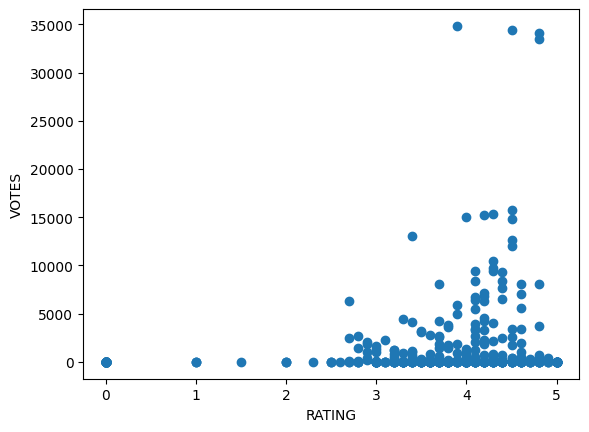

In [ ]:
plt.scatter(fandango['RATING'], fandango['VOTES'])
plt.xlabel('RATING')
plt.ylabel('VOTES')
plt.show()

**TASK: Bütün columnlar arasındaki ilişkiye bakın**

In [ ]:
corr_matrix = fandango.corr()
corr_matrix

<ipython-input-10-2f86455ad67a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Bir şekilde 'Yıl' sütunu ekleyin**

In [ ]:
fandango['Yıl'] = fandango['FILM'].str[-5:-1].astype(int)
fandango.head()

,FILM,STARS,RATING,VOTES,Yıl
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**TASK: Elimizdeki Fandango verilerinde yıl başına düşen film sayılarını bulun**

In [ ]:
film_sayilari = fandango.groupby('Yıl')['FILM'].count()
sonuc = pd.DataFrame({'YEAR': film_sayilari.index, 'FILM SAYISI': film_sayilari.values}).sort_values('YEAR')
print(sonuc)

   YEAR  FILM SAYISI
0  1964            1
1  2012            1
2  2014           23
3  2015          478
4  2016            1


**TASK: Bir plot ile yıllara düşen film sayılarını görselleştirin:**

<Axes: >

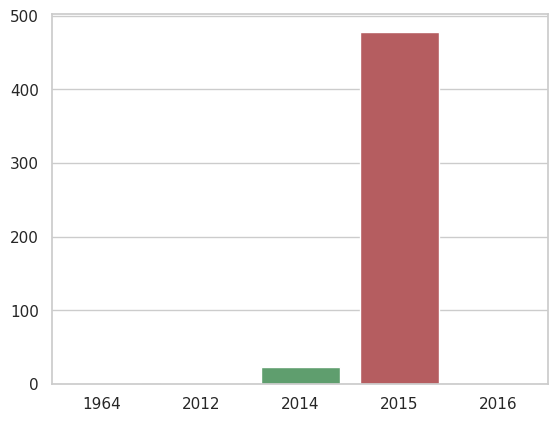

In [ ]:
sns.set(style="whitegrid")

film_sayilari = fandango['Yıl'].value_counts().sort_index()


film_sayilari = film_sayilari.loc[film_sayilari != 0]

sns.barplot(x=film_sayilari.index, y=film_sayilari.values)

**TASK: En fazla oyu alan 10 film hangileridir?**

In [ ]:
film_ratings = fandango[["FILM","STARS", "RATING", "VOTES","Yıl"]]
en_iyi_filmler = film_ratings.sort_values("VOTES", ascending=False).head(10)
en_iyi_filmler

,FILM,STARS,RATING,VOTES,Yıl
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: Kaç tane film 0 vote'u aldı ?**

In [ ]:
d = len(fandango[fandango["VOTES"] == 0])

print(d)

69


**TASK: Sıfır oyu olan filmleri kaldırarak yalnızca incelenen filmlerin dataframe'ini oluşturun.**

In [ ]:
fandango_no_zero_votes = fandango[fandango["VOTES"] != 0]




**TASK: Bazı filmlerde usulsüzlük yapıldığı ve kullanıcılara gösterilen STARS değerlerinin gerçek RATING değerlerinden biraz daha fazla çıktığı düşünüyoruz. 'STARS_DIFF' adında yeni bir column ekleyerek STARS ile RATING arasındaki farkları bu column'da tutun.**

In [ ]:
fandango_no_zero_votes['STARS_DIFF'] = fandango_no_zero_votes['STARS'] - fandango_no_zero_votes['RATING']
fandango_no_zero_votes

<ipython-input-17-dcef8eb0fe46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_no_zero_votes['STARS_DIFF'] = fandango_no_zero_votes['STARS'] - fandango_no_zero_votes['RATING']


,FILM,STARS,RATING,VOTES,Yıl,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: STARS_DIFF sütunundaki verilerin kaçar kez oluştuğunu count edin ve plotlayın**

<ipython-input-18-19fc6354eb51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_no_zero_votes['STARS_DIFF'] = fandango_no_zero_votes['STARS_DIFF'].round(3)


<Axes: >

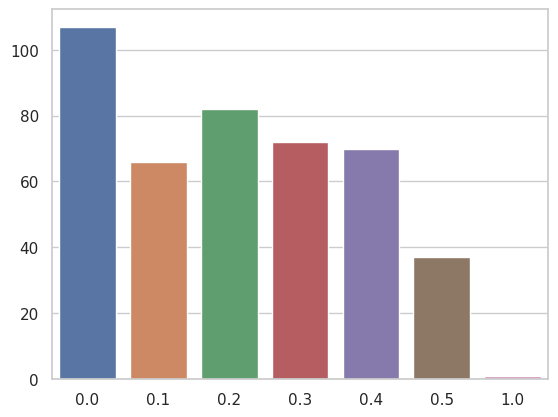

In [ ]:
fandango_no_zero_votes['STARS_DIFF'] = fandango_no_zero_votes['STARS_DIFF'].round(3)
stars_diff_count = fandango_no_zero_votes['STARS_DIFF'].value_counts()

sns.barplot(x=stars_diff_count.index, y=stars_diff_count.values)

**TASK Üstteki plot'dan gördüğümüz üzere STARS_DIFF'i 1 olan film bile var. Bu çok yoğun usulsüzlük yapılan filmi getirin ve inceleyelim.**

In [ ]:
fandango_no_zero_votes[fandango_no_zero_votes['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,Yıl,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Fandango Puanlamalarını Başka Sitelerle Karşılaştıralım

**TASK: "all_sites_scores.csv" dosyasını okuyun**

In [ ]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Bu csv dosyasını da keşfetmek için temel analiz başlangıcı kodlarını yazın.**

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [ ]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Önce Rotten Tomatoes'i inceleyelim. RottenTomatoes adında gerçek yorumcuların derecelendirmeleri ve RottenTomatoes_User adında kullanıcıların derecelendirmelerini içeren bir sütun bulunuyor. Bu sütunları plot edelim.

**TASK: Aşağıdaki gibi bir scatterplot oluşturun.**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

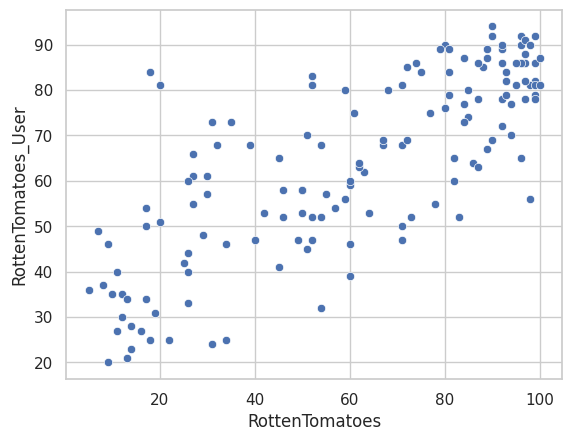

In [ ]:
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')

**TASK: Rotten DIFF adında bir column oluşturun ve bu column RottenTomatoes-RottenTomatoes_User bilgilerinden oluşsun.**

In [ ]:
all_sites['Rotten DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**TASK: RT Eleştirmen Puanı ile RT Kullanıcı Puanı arasındaki farkların dağılımını çizin. Bu dağılım grafiğinde negatif değerler olmalıdır. Bu dağıtımı görüntülemek için KDE veya Histogramları kullanabilirsiniz**

<Axes: xlabel='Rotten DIFF', ylabel='Count'>

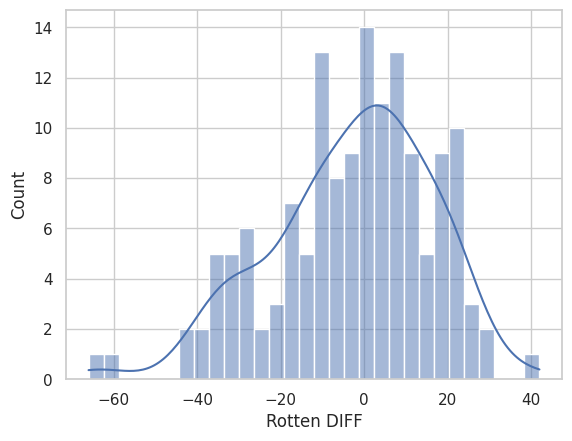

In [ ]:
sns.histplot(data=all_sites, x="Rotten DIFF", kde=True, bins=30)

**Hadi Kullanıcı ile eleştirmen puanlamaları arasındaki farkın(Rotten_Diff) en yüksek ve en düşük olduğu filmlere bi bakalım.**

**TASK: Ortalama olarak kullanıcıların, eleştirmenlerden daha fazla sevdiği 5 filmi getirin.**

In [ ]:
all_sites[['FILM', 'Rotten DIFF']].sort_values('Rotten DIFF').head(5)

,FILM,Rotten DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Şimdi de tam tersi, kullanıcıların eleştirmenlerden bile daha çok sevmediği 5 filmi getirin**

In [ ]:
all_sites[['FILM', 'Rotten DIFF']].sort_values('Rotten DIFF',ascending=False).head(5)

,FILM,Rotten DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Burdan sonraki analizlerde sizi özgür bırakıyoruz. İstediğiniz her şeye bakabilir her türlü incelemeyi ve plot'u çizdirebilirsiniz. Ve en sonunda ulaşmanızı istediğimiz bir sonuç var. *Fandango* sitesi kullanıcıları film puanlamaları konusunda kayda değer ölçüde kandırıyor çünkü .... şeklinde bir karara varmanız ya da *Fandango* sitesi diğer sitelere benzer bir tutum sergiliyor ve herhangi bir yanlış yönlendirme yapmıyor çünkü .... şeklinde bir karara varmanız. 

Varacağınız bu kararı maddeler ve kanıtlar halinde notebook'unuzun en altında mantıklı bir şekilde delilleriyle açıklayın. Burada hangi karara varırsanız varın önemli olan ve bizim de EmKa Academy olarak dikkat edeceğimiz şey, ulaştığınız kararı düzgün bir şekilde açıklayabiliyor musunuz ? Asıl odaklandığımız nokta sonuçtan ziyade bu. O yüzden en altta maddeler halinde kararınızı açıklarken dikkatli davranın. 

In [ ]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [ ]:
merged_df = pd.merge(fandango, all_sites, on='FILM')
merged_df['STARS']=merged_df['STARS']*20
merged_df['IMDB']=merged_df['IMDB']*10

Öncelikle tüm siteların filmlerini yüzlük olarak birleştirdik.

In [ ]:
merged_df

,FILM,STARS,RATING,VOTES,Yıl,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten DIFF
0,Fifty Shades of Grey (2015),80.0,3.9,34846,2015,25,42,46,3.2,42.0,778,179506,-17
1,Jurassic World (2015),90.0,4.5,34390,2015,71,81,59,7.0,73.0,1281,241807,-10
2,American Sniper (2015),100.0,4.8,34085,2015,72,85,72,6.6,74.0,850,251856,-13
3,Furious 7 (2015),100.0,4.8,33538,2015,81,84,67,6.8,74.0,764,207211,-3
4,Inside Out (2015),90.0,4.5,15749,2015,98,90,94,8.9,86.0,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",70.0,3.5,41,2015,87,63,68,6.4,67.0,19,5289,24
141,The Diary of a Teenage Girl (2015),80.0,3.6,38,2015,95,81,87,6.3,70.0,18,1107,14
142,The Wrecking Crew (2015),90.0,4.2,38,2015,93,84,67,7.0,78.0,4,732,9
143,Tangerine (2015),80.0,3.9,36,2015,95,86,86,7.3,74.0,14,696,9


In [ ]:
merged_df[['STARS', 'IMDB', 'RottenTomatoes', 'Metacritic']].corr()

,STARS,IMDB,RottenTomatoes,Metacritic
STARS,1.000000,0.585114,0.290192,0.177523
IMDB,0.585114,1.000000,0.777921,0.725744
RottenTomatoes,0.290192,0.777921,1.000000,0.957243
Metacritic,0.177523,0.725744,0.957243,1.000000


Sonra genel bir fikir edinmek için correlation bulmak mantıklı geldi. Gördüğünüz üzere Fandando dışındaki üç sitenin rating correlation'ı 1'e gayet yakın ancak Fandango'nun diğer sitelerle negatif correlation'ı olmasa da sıfıra yakın(indecisive) bir correlation çıktığını görüyoruz. IMDB ile diğerlerinden çok daha fazla pozitif correlation'ının olması da acaba line graph ile nasıl gözükür sorusunu merak ettiriyor.

In [ ]:
worst_rated = merged_df.sort_values(by='RottenTomatoes', ascending=True)

# Select the 10 worst rated movies based on RottenTomatoes rating
worst_rated = worst_rated.head(100)


                                      FILM  RottenTomatoes  Metacritic  IMDB  \
49           Paul Blart: Mall Cop 2 (2015)               5          13  43.0   
84                 Hitman: Agent 47 (2015)               7          28  59.0   
54                      Hot Pursuit (2015)               8          31  49.0   
25                          Taken 3 (2015)               9          26  61.0   
28                   Fantastic Four (2015)               9          27  40.0   
..                                     ...             ...         ...   ...   
108                       Black Sea (2015)              82          62  64.0   
100               While We're Young (2015)              83          76  64.0   
90       Far From The Madding Crowd (2015)              84          71  72.0   
132  The Stanford Prison Experiment (2015)              84          68  71.0   
125                    The Wolfpack (2015)              84          75  71.0   

     STARS  
49    70.0  
84    80.0  


Line graph çizebilmek için RottenTomatoes sitesine göre en kötü filmden en iyisine 100 filmi sıralıyoruz.

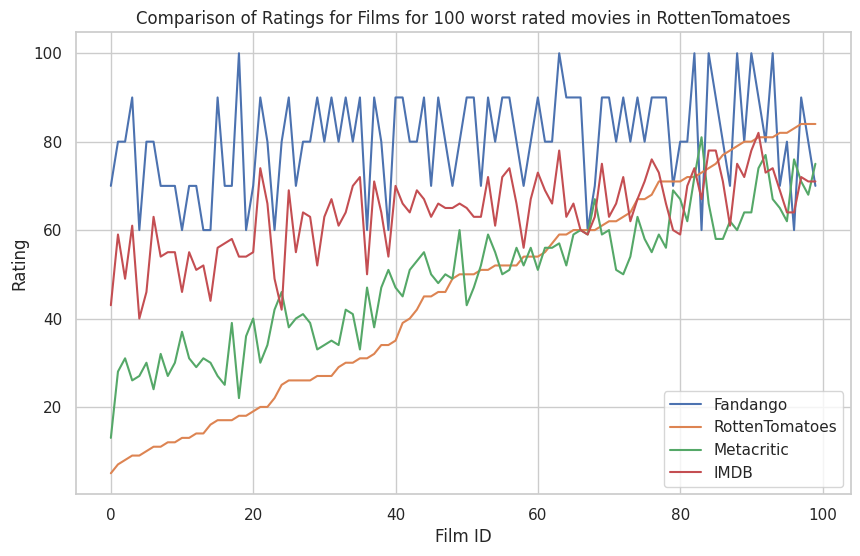

In [ ]:
selected_films = worst_rated

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a line graph for the selected films and their corresponding ratings
plt.plot(range(len(selected_films)), selected_films['STARS'], label='Fandango')
plt.plot(range(len(selected_films)), selected_films['RottenTomatoes'], label='RottenTomatoes')
plt.plot(range(len(selected_films)), selected_films['Metacritic'], label='Metacritic')
plt.plot(range(len(selected_films)), selected_films['IMDB'], label='IMDB')

# Add x-axis and y-axis labels, title, and legend
plt.xlabel('Film ID')
plt.ylabel('Rating')
plt.title('Comparison of Ratings for Films for 100 worst rated movies in RottenTomatoes')
plt.legend(loc='best')

# Show the plot
plt.show()

Sonra RottenTomatoes'un 100 en düşük ratingli film sıralamasına göre yapılmış line graph bize çok net yorum yapılabilecek görsellikler veriyor.
1. Fandango en 'kötü' filmlere bile 60'tan az rating vermiyor,
2. IMDB sitesi ile aralarında net bir davranış benzerliği olsa da Fandango özellikle low-rated filmlerin ratinglerini şişiriyor.
        Bu iki özellik acaba bu 100 film için Fandango sitesinde ortalama ne kadar bir pozitif fark oluşturulduğunu merak ettiriyor.


Text(0.5, 1.0, 'Average rating offset of Fandango ratings according to other sites for 100 worst rated films(worst in RottenTomatoes)')

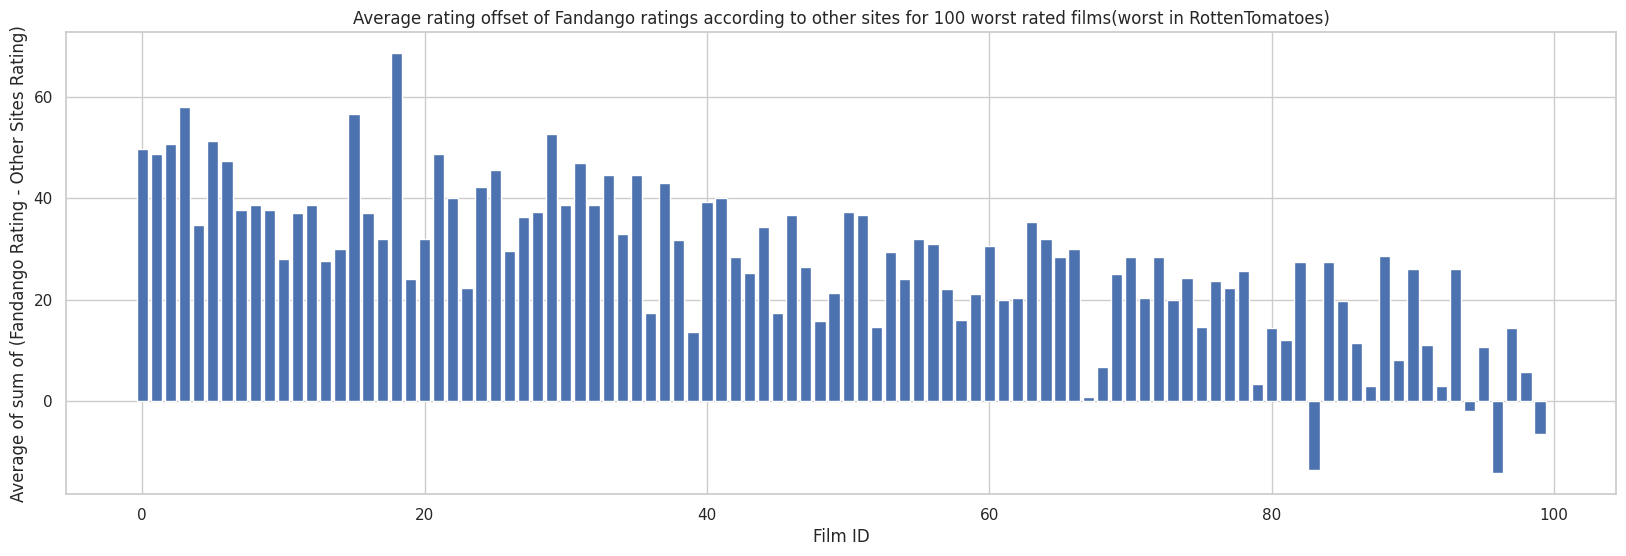

In [ ]:
selected_films['Fandango_diff'] = (selected_films['STARS'] - selected_films['RottenTomatoes']+selected_films['STARS'] - selected_films['Metacritic']+selected_films['STARS'] - selected_films['IMDB'])/3

# Pivot the dataframe to get the sum of Fandango rating minus other film sites' rating for each movie


# Create a heatmap that shows the sum of Fandango rating minus other film sites' rating for all the films
plt.figure(figsize=(20, 6))

# Create a bar chart of the differences by year
plt.bar(range(len(selected_films)),selected_films['Fandango_diff'])

# Add x-axis and y-axis labels, title
plt.xlabel('Film ID')
plt.ylabel('Average of sum of (Fandango Rating - Other Sites Rating)')
plt.title('Average rating offset of Fandango ratings according to other sites for 100 worst rated films(worst in RottenTomatoes)')

# Show the plot


Bu grid graph'te de görüleceği üzere ortalama offset giderek azalıyor ancak yine de bu verilere dayanarak Fandango'nun diğer sitelerde çok daha düşük rate'lenmiş filmlere bir şişirme uygulayarak izleyiciyi yanılttığını söyleyebiliriz.

# BAŞARILAR

----